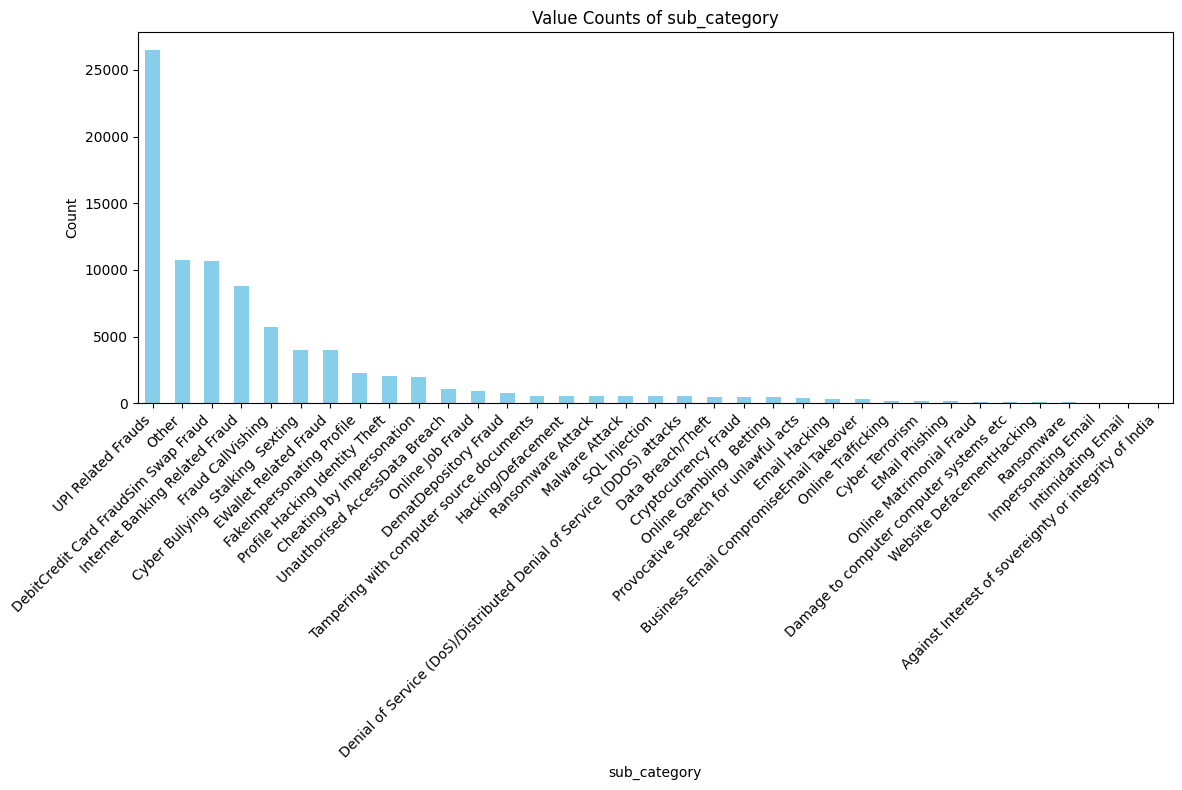

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv('train_cleaned.csv') # Uncomment and specify your file if needed

# Replace 'column_name' with the actual column you want to analyze
column_name = 'sub_category'

# Calculate value counts for the specified column
value_counts = df[column_name].value_counts()

# Plot the value counts as a bar graph
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title(f'Value Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Initial Value Counts:
 sub_category
UPI Related Frauds                                                      26492
Other                                                                   10728
DebitCredit Card FraudSim Swap Fraud                                    10693
Internet Banking Related Fraud                                           8826
Fraud CallVishing                                                        5710
Cyber Bullying  Stalking  Sexting                                        4004
EWallet Related Fraud                                                    3981
FakeImpersonating Profile                                                2246
Profile Hacking Identity Theft                                           2026
Cheating by Impersonation                                                1950
Unauthorised AccessData Breach                                           1094
Online Job Fraud                                                          901
DematDepository Fraud       

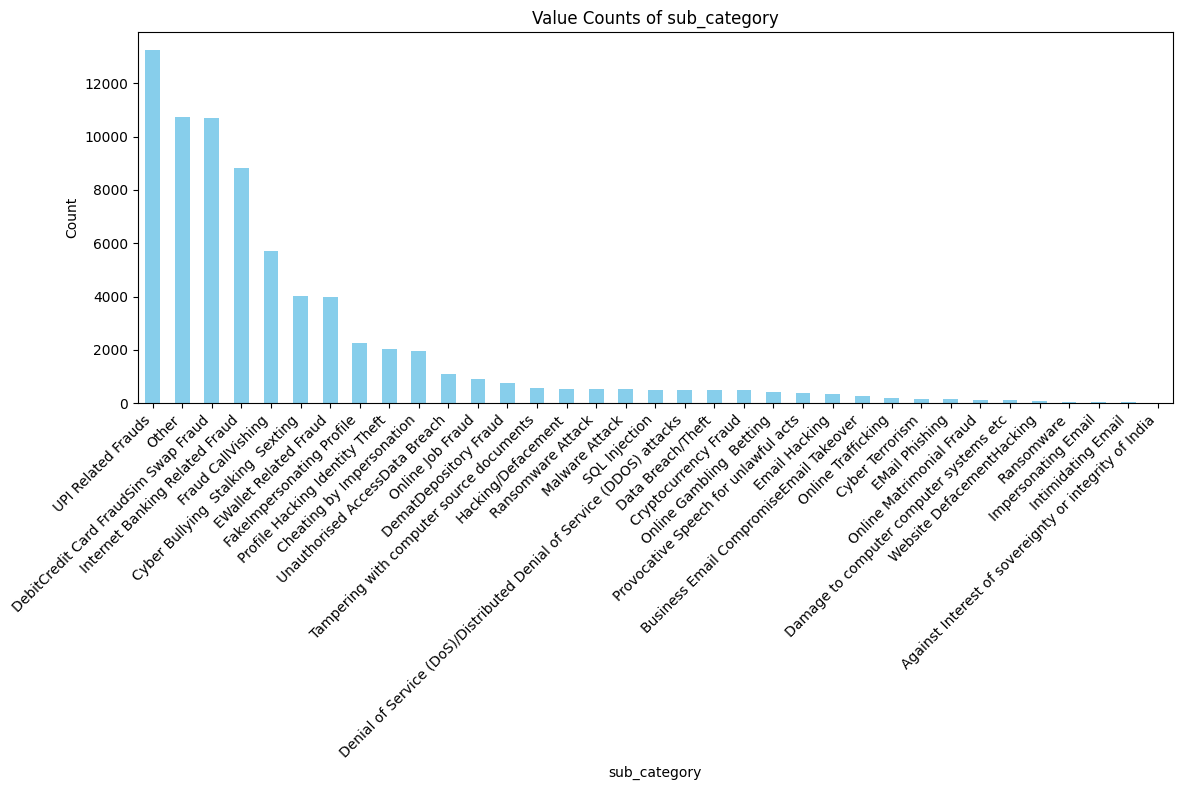

In [12]:
import pandas as pd

value_counts = df['sub_category'].value_counts()
print("Initial Value Counts:\n", value_counts)

upi_fraud_rows = df[df['sub_category'] == 'UPI Related Frauds']

rows_to_delete = upi_fraud_rows.sample(frac=0.5, random_state=1)
print(len(rows_to_delete))
df_modified = df.drop(rows_to_delete.index)

updated_value_counts = df_modified['sub_category'].value_counts()
print("Updated Value Counts:\n", updated_value_counts)
value_counts = df_modified[column_name].value_counts()

plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title(f'Value Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Optional: Save the modified DataFrame to a new CSV file
df_modified.to_csv('train_modified.csv', index=False)


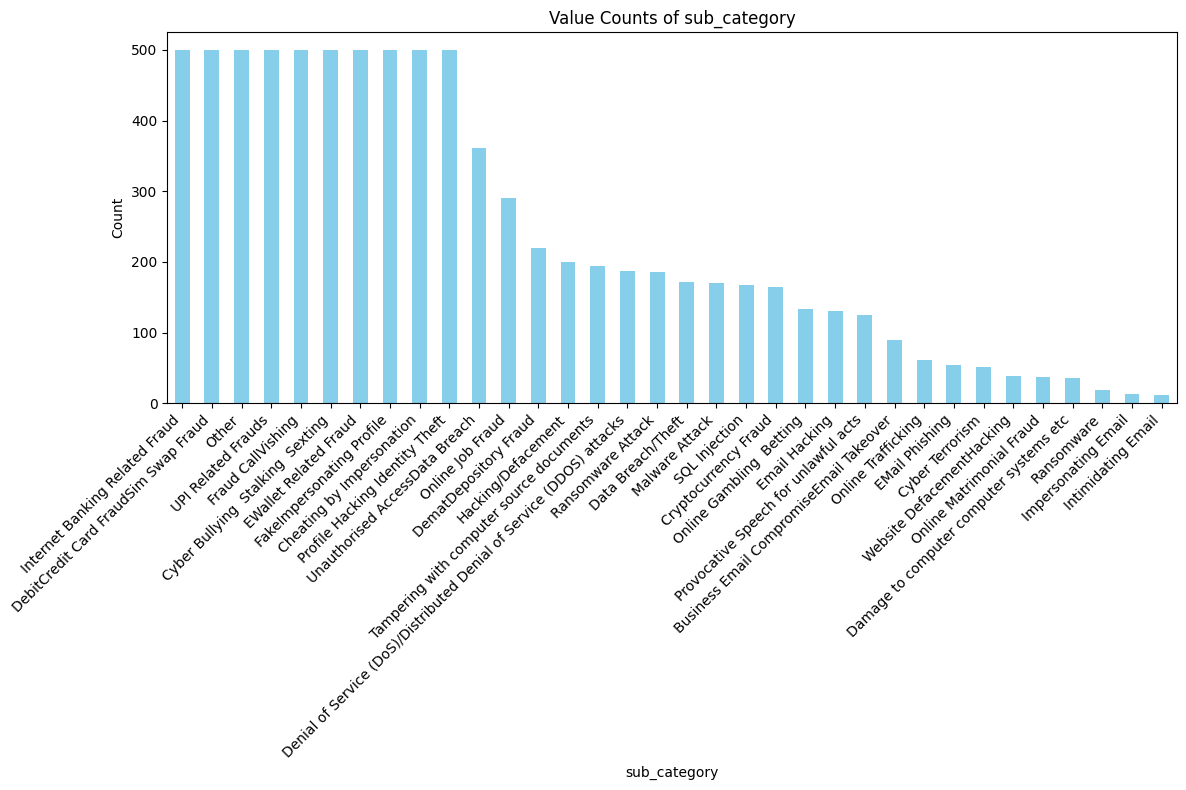

In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('test_cleaned.csv')

# Step 1: Find sub_category values with counts greater than 2000
value_counts = df['sub_category'].value_counts()
high_count_categories = value_counts[value_counts > 500].index

# Step 2: For each high-count category, retain only 2000 rows and drop the rest
dfs = []  # List to store filtered data for each category
for category in high_count_categories:
    # Select all rows with the current category
    category_rows = df[df['sub_category'] == category]
    
    # Sample 2000 rows and add to list, excluding the extra rows
    sampled_rows = category_rows.sample(n=500, random_state=1)
    dfs.append(sampled_rows)

# Step 3: Concatenate the reduced rows with the remaining DataFrame data
# Keep rows with sub_categories that weren't over 2000 counts
remaining_data = df[~df['sub_category'].isin(high_count_categories)]
df_modified = pd.concat([remaining_data] + dfs).reset_index(drop=True)
value_counts = df_modified[column_name].value_counts()

# Plot the value counts as a bar graph
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color='skyblue')
plt.title(f'Value Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_modified.to_csv('test_reduced.csv', index=False)


In [24]:
from datasets import load_dataset

# Specify both train and test files
data_files = {
    'train': 'train_cleaned.csv',
    'test': 'test_cleaned.csv'
}

# Load both train and test splits
dataset = load_dataset('csv', data_files=data_files)

# Check the structure
print(dataset)


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['category', 'sub_category', 'crimeaditionalinfo'],
        num_rows: 85945
    })
    test: Dataset({
        features: ['category', 'sub_category', 'crimeaditionalinfo'],
        num_rows: 28619
    })
})


In [44]:
import pandas as pd

# Load the CSV file
train = pd.read_csv('train_cleaned.csv')

# Drop the 'category' column
train = train.drop(columns=['category'])

train['crimeaditionalinfo'] = train['crimeaditionalinfo'].astype(str)
train = train.rename(columns={'sub_category': 'label_text', 'crimeaditionalinfo': 'text'})

labels = train['label_text'].unique().tolist()
print(len(labels))
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in id2label.items()}  # Reverse mapping

# Add the 'label_id' column by mapping the 'label' column to ids
train['label'] = train['label_text'].map(label2id)
df.to_csv('hf_train.csv', index=False)


35


In [45]:
from datasets import load_dataset

# Specify both train and test files
data_files = {
    'train': 'hf_train.csv',
    'test': 'hf_test.csv'
}

# Load both train and test splits
dataset = load_dataset('csv', data_files=data_files)

# Check the structure
print(dataset)
dataset.save_to_disk('my_dataset')

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 85945
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 85945
    })
})


Saving the dataset (0/1 shards):   0%|          | 0/85945 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/85945 [00:00<?, ? examples/s]

In [5]:
# Removing Stop Words
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('test_cleaned.csv')

stop_words = set(stopwords.words('english'))

def remove_stop_words(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)  # Join the filtered words back into a string
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].astype(str)

df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(remove_stop_words)
df.to_csv('test_cleaned_v2.csv', index=False)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
df = pd.read_csv("train_cleaned_v2.csv")
df

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continue received random calls abusive message...
1,Online Financial Fraud,Fraud CallVishing,fraudster continuously messaging asking pay mo...
2,Online Gambling Betting,Online Gambling Betting,acting like police demanding money adding sect...
3,Online and Social Media Related Crime,Online Job Fraud,apna job applied job interview telecalling res...
4,Online Financial Fraud,Fraud CallVishing,received call lady stating send new phone vivo...
...,...,...,...
85887,Online Financial Fraud,Internet Banking Related Fraud,identity theft smishing sms fraud creditdebit ...
85888,Online Financial Fraud,EWallet Related Fraud,received call number asking phone pay cash bac...
85889,Online Financial Fraud,UPI Related Frauds,cyber stalking blackmailing phonesmsvoip calls...
85890,Online and Social Media Related Crime,Online Matrimonial Fraud,call karke bola ki aapka lotary laga ha aru ac...
